http://chappers.github.io/data/a-comparison-of-randomized-optimization-methods.pdf

### Advantages of simulated annealing

In [1]:
import numpy as np
import six
import sys

sys.modules['sklearn.externals.six'] = six
import mlrose
import math

In [2]:
max_attempts = 10
max_iters = 100
random_state = 1
history = True
max_val = 8

# Define initial state
init_state = np.array([0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
from matplotlib import pyplot as plt

def plot(fitness_curve):
    xticks = np.arange(fitness_curve.shape[0])
    plt.figure(figsize=(20,5))
    plt.plot(fitness_curve)
    plt.yticks(fitness_curve)
    plt.xticks(xticks)
    plt.show()

In [4]:
def function_generator(size):
    function = np.zeros(shape=(size))
    for i in range(len(function)):
        function[i] = int(25*math.sin(i)) + int(25*math.cos(i))

    # insert local peaks
    function[int(size*0.25):(int(size*0.25)+5)] = 50 
    function[int(size*0.75):(int(size*0.75)+5)] = 50 
    function[size-1] = 50 
    
    # insert global peak
    function[int(size*0.5)-1] = 75     
    function = np.abs(function)
    
    return function

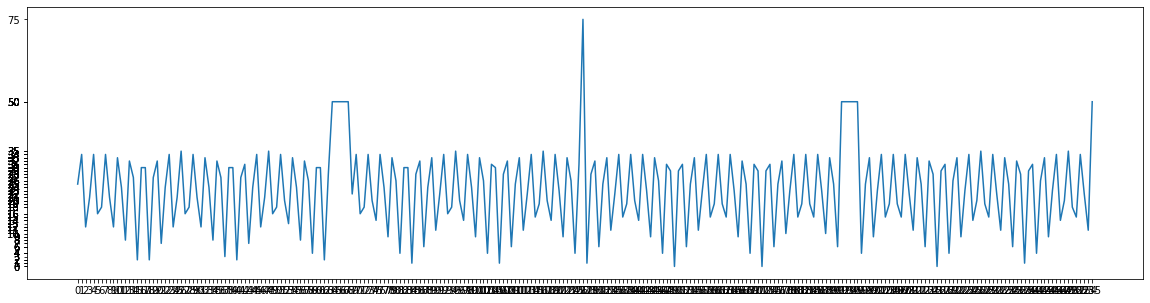

In [6]:
func = function_generator(256)
plot(func)

In [7]:
def my_fitness_func(state):
    
    # Initialize counter
    fitness_cnt = 0
    hex = 0
    
    function = function_generator(2**state.shape[0])
        
    for pos in range(len(state)):
        hex += ((2**pos)*state[pos]).astype(np.int)

#     print(hex, state)
#     print(function[hex])
#     print("")
    return function[hex]

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(my_fitness_func)

### Loop through all algos with different random state

In [8]:
# max_attempts = 1
# max_iters = 1
# random_state = 1
# history = False
# max_val = 2

# # Define initial state
# init_state = np.array([0, 0, 0, 0, 0, 0, 0, 0])

# problem = mlrose.DiscreteOpt(length = init_state.shape[0], fitness_fn = fitness_cust, 
#                                  maximize = True, max_val = max_val)
# # init_state = np.random.randint(0, max_val, size=(max_val,))
# print(init_state)

# best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
#                                                     max_iters=max_iters, restarts=0, init_state=init_state, 
#                                                     curve=history, random_state=random_state)
# print(best_state)
# print(best_fitness)

In [9]:
max_attempts = 10
max_iters = 100
history = False
max_val = 2

rhc = {}
sa = {}
ga = {}
mimic = {}

rhc['best_state'] = []
rhc['best_fitness'] = []
rhc['fitness_curve'] = []

sa['best_state'] = []
sa['best_fitness'] = []
sa['fitness_curve'] = []

ga['best_state'] = []
ga['best_fitness'] = []
ga['fitness_curve'] = []

mimic['best_state'] = []
mimic['best_fitness'] = []
mimic['fitness_curve'] = []

schedule = mlrose.ExpDecay()
init_state = np.array([0, 0, 0, 0, 0, 0, 0, 0])

problem = mlrose.DiscreteOpt(length = init_state.shape[0], fitness_fn = fitness_cust, 
                                 maximize = True, max_val = max_val)
Total_Runs = 10

for i in range(Total_Runs):
    random_state = i

    
    # Solve problem using random hill climbing annealing
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                                                    max_iters=max_iters, restarts=1, init_state=init_state, 
                                                    curve=history, random_state=random_state)
    rhc['best_state'].append(best_state)
    rhc['best_fitness'].append(best_fitness)
    

    # Solve problem using simulated annealing
    best_state, best_fitness = mlrose.simulated_annealing(problem,schedule=schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      init_state = init_state, curve = history, 
                                                        random_state = random_state)
    sa['best_state'].append(best_state)
    sa['best_fitness'].append(best_fitness)
   

    # Solve problem using Genetic Algo
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=100, 
                                                  mutation_prob=0.1, max_attempts=max_attempts, 
                                                  max_iters=max_iters, curve=history, random_state=random_state)
    ga['best_state'].append(best_state)
    ga['best_fitness'].append(best_fitness)
    
    # Solve problem using MIMIC
    best_state, best_fitness = mlrose.mimic(problem, pop_size=200, 
                                            keep_pct=0.2, max_attempts=max_attempts, 
                                            max_iters=max_iters, curve=history, random_state=random_state, 
                                            fast_mimic=False)
    mimic['best_state'].append(best_state)
    mimic['best_fitness'].append(best_fitness)    

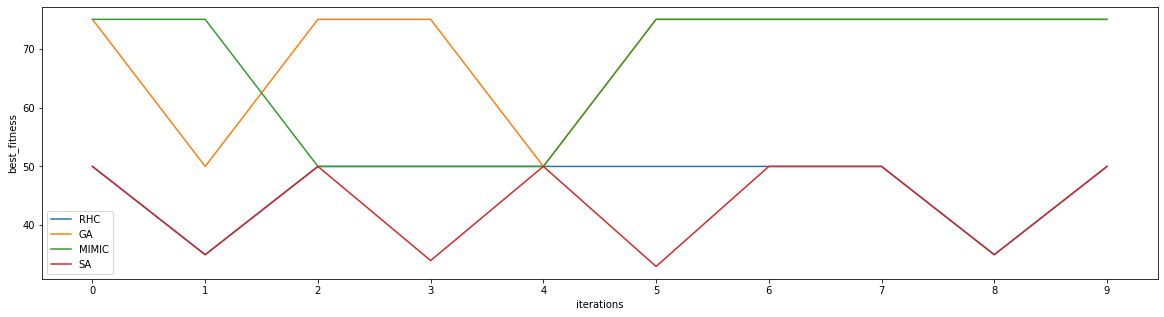

In [10]:
x = list(range(len(rhc['best_fitness'])))
plt.figure(figsize=(20,5))
plt.plot(x, rhc['best_fitness'], label="RHC")
plt.plot(x, ga['best_fitness'], label="GA")
plt.plot(x, mimic['best_fitness'], label="MIMIC")
plt.plot(x, sa['best_fitness'], label="SA")

plt.xticks(x)
plt.xlabel('iterations')
plt.ylabel('best_fitness')

plt.legend()
plt.show()

### Simulated Annealing

[0 0 1 0 1 1 0 1]
34.0


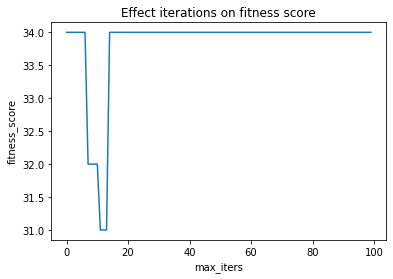

CPU times: user 344 ms, sys: 31.7 ms, total: 376 ms
Wall time: 380 ms


In [29]:
%%time
# Define decay schedule
sched = mlrose.ExpDecay()
# sched = mlrose.GeomDecay()

max_attempts = 50
max_iters = 100
history = True
max_val = 2
random_state = 3

# Solve problem using simulated annealing
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=sched,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      init_state = init_state, curve = history, 
                                                        random_state = random_state)

print(best_state)
print(best_fitness)
plt.xlabel('max_iters')
plt.ylabel('fitness_score')

plt.plot(fitness_curve)
plt.title('Effect iterations on fitness score')    
plt.show()

In [ ]:
plot(fitness_curve)

### Random Hill Climbing

[0 0 1 0 0 0 1 0]
50.0


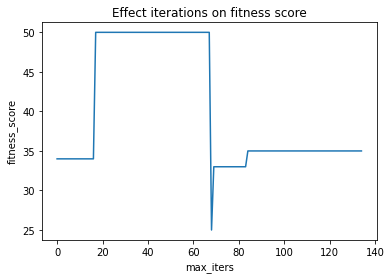

CPU times: user 300 ms, sys: 22.6 ms, total: 323 ms
Wall time: 315 ms


In [30]:
%%time
max_attempts = 50
max_iters = 100
history = True
max_val = 2
random_state = 3

# Solve problem using random hill climbing annealing
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                                                    max_iters=max_iters, restarts=1, init_state=init_state, 
                                                    curve=history, random_state=random_state)

print(best_state)
print(best_fitness)

plt.xlabel('max_iters')
plt.ylabel('fitness_score')

plt.plot(fitness_curve)
plt.title('Effect iterations on fitness score')    
plt.show()


### Genetic Algo

[1 1 1 1 1 1 1 0]
75.0


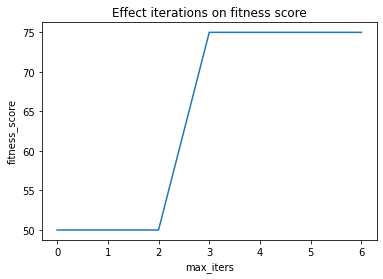

CPU times: user 702 ms, sys: 34.6 ms, total: 736 ms
Wall time: 736 ms


In [40]:
%%time
max_attempts = 3
max_iters = 10
history = True
max_val = 2
random_state = 3

# Define decay schedule
schedule = mlrose.ExpDecay()

# Solve problem using simulated annealing
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=100, 
                                              mutation_prob=0.1, max_attempts=max_attempts, 
                                              max_iters=max_iters, curve=history, random_state=random_state)

print(best_state)
print(best_fitness)

plt.xlabel('max_iters')
plt.ylabel('fitness_score')

plt.plot(fitness_curve)
plt.title('Effect iterations on fitness score')    
plt.show()

### MIMIC

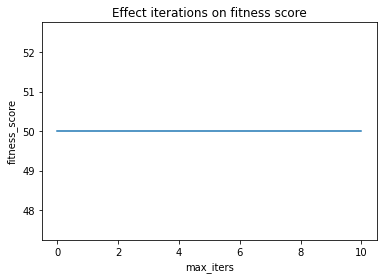

CPU times: user 1.62 s, sys: 29.6 ms, total: 1.65 s
Wall time: 1.64 s


In [43]:
%%time
max_attempts = 10
max_iters = 100
history = True
max_val = 2
random_state = 3

# Solve problem using MIMIC
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200, 
                                        keep_pct=0.2, max_attempts=max_attempts, 
                                        max_iters=max_iters, curve=history, random_state=random_state, 
                                        fast_mimic=False)
plt.xlabel('max_iters')
plt.ylabel('fitness_score')

plt.plot(fitness_curve)
plt.title('Effect iterations on fitness score')    
plt.show()

In [ ]:
plot(fitness_curve)